In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure

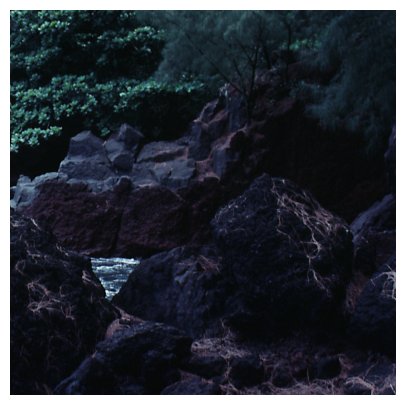

In [2]:
# Image
color_img = io.imread("/content/colorimage.tif")

# Plot
plt.figure(figsize=(10,5))

plt.imshow(color_img, cmap="gray")
plt.axis("off")

plt.show()

## RGB Equalization

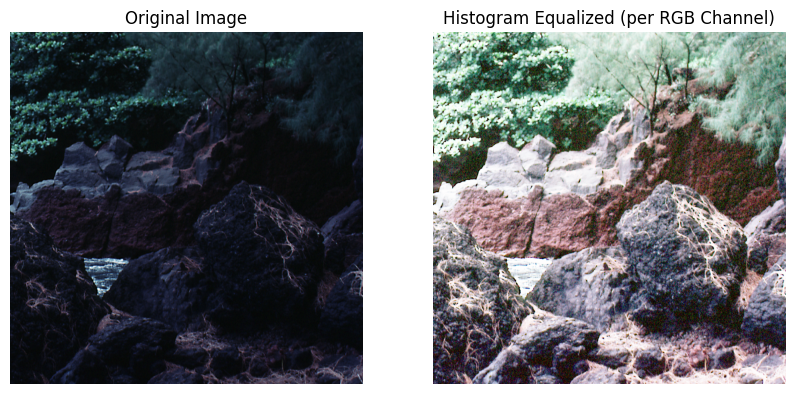

In [4]:
# Histogram equalization on each color channel
r_eq = exposure.equalize_hist(color_img[:, :, 0])
g_eq = exposure.equalize_hist(color_img[:, :, 1])
b_eq = exposure.equalize_hist(color_img[:, :, 2])

# Combine channels
img_eq = np.stack((r_eq, g_eq, b_eq), axis=2)  # Combining the channels

# Plot
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(color_img, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(img_eq)
ax[1].set_title("Histogram Equalized (per RGB Channel)")
ax[1].axis("off")

plt.show()

## HSV Equalization

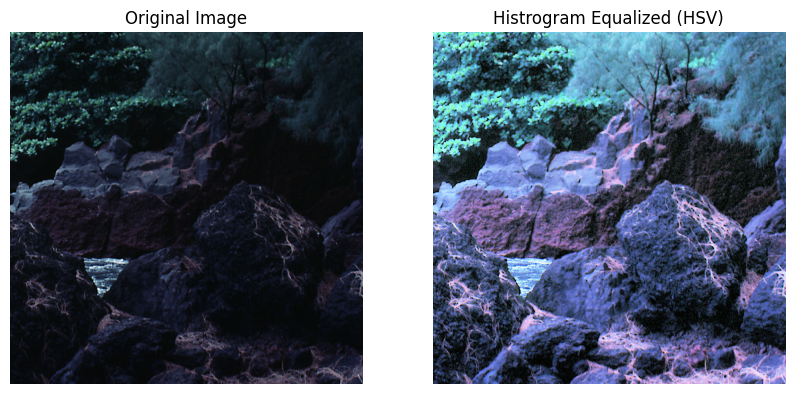

In [6]:
# Convert to HSV color space
hsv_img = color.rgb2hsv(color_img)

# Extract V (value) channel
v_channel = hsv_img[:, :, 2]  # Equalize only Value channel so that natural colors are preserved

# Histogram Equalization on V channel
v_eq = exposure.equalize_hist(v_channel)

# Reeplace original value channel with new equalized one
hsv_eq = hsv_img.copy()
hsv_eq[:, :, 2] = v_eq

# Convert to RGB
img_eq = color.hsv2rgb(hsv_eq)

# Plotting
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(color_img, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(img_eq)
ax[1].set_title("Histrogram Equalized (HSV)")
ax[1].axis("off")

plt.show()
